<a href="https://colab.research.google.com/github/jeet1912/ms/blob/main/ds675/Project/fraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [161]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import plot_tree

In [162]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, KernelPCA
from sklearn.pipeline import Pipeline

from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [163]:
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

In [164]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Import

# New section

In [166]:
df = pd.read_csv('/content/drive/Shareddrives/df675Project/creditcard_2023.csv')

In [167]:
df.drop(columns=['id'],inplace=True)
df.shape

(568630, 30)

In [168]:
df.drop_duplicates(inplace=True)

In [169]:
df.shape

(568629, 30)

In [170]:
df.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class'],
      dtype='object')

# Bins

In [171]:
df['Amount'].min(), df['Amount'].max(), df['Amount'].std(), df['Amount'].mean()

(50.01, 24039.93, 6919.636504385441, 12041.939156216093)

<Axes: xlabel='Amount', ylabel='Count'>

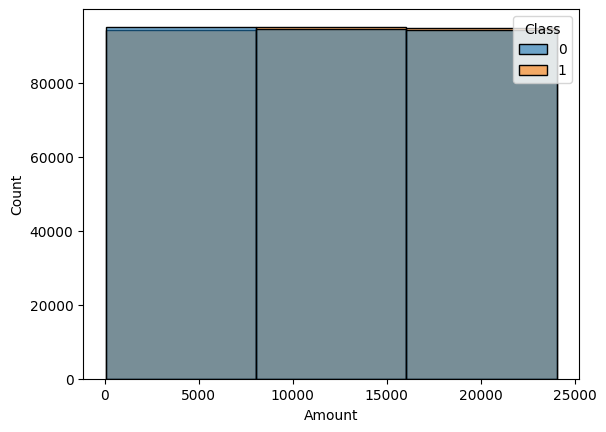

In [172]:
sns.histplot(df, x='Amount',hue='Class',alpha=0.6, bins=3)

# Creating Bins

In [173]:
bins = df['Amount'].quantile([0, 0.33, 0.67, 1]).values
q33 = bins[1]
q67 = bins[2]

In [174]:
q33, q67

(7964.721200000002, 16109.7176)

In [175]:
df['Cat_Amount'] = pd.cut(df['Amount'], bins=bins, labels=["Above 50.01", "Between q33 and q76", "Below 24039.93"], include_lowest=True)

In [64]:
df.dtypes

V1             float64
V2             float64
V3             float64
V4             float64
V5             float64
V6             float64
V7             float64
V8             float64
V9             float64
V10            float64
V11            float64
V12            float64
V13            float64
V14            float64
V15            float64
V16            float64
V17            float64
V18            float64
V19            float64
V20            float64
V21            float64
V22            float64
V23            float64
V24            float64
V25            float64
V26            float64
V27            float64
V28            float64
Amount         float64
Class            int64
Cat_Amount    category
dtype: object

# Features and Target Variables

In [176]:
X = df.drop(columns=['Class','Amount'],axis=1)
y = df['Class']

# Create Test and Train Sets

In [177]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print("Training :", X_train.shape, y_train.shape)
print("Test:", X_test.shape, y_test.shape)

Training : (426471, 29) (426471,)
Test: (142158, 29) (142158,)


In [178]:
type(X_train)

pandas.core.frame.DataFrame

In [16]:
X_train.columns, X_test.columns

(Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
        'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
        'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Cat_Amount'],
       dtype='object'),
 Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
        'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
        'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Cat_Amount'],
       dtype='object'))

In [179]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.select_dtypes(exclude=['category']))
X_test_scaled = scaler.transform(X_test.select_dtypes(exclude=['category']))

In [180]:
type(X_train_scaled)

numpy.ndarray

In [185]:
colTrain = X_train.iloc[:,-1]
colTest = X_test.iloc[:,-1]

In [186]:
colTest

383392    Between q33 and q76
504221            Above 50.01
4794              Above 50.01
462982            Above 50.01
278970            Above 50.01
                 ...         
252826    Between q33 and q76
529461         Below 24039.93
431796            Above 50.01
43194     Between q33 and q76
258999            Above 50.01
Name: Cat_Amount, Length: 142158, dtype: category
Categories (3, object): ['Above 50.01' < 'Between q33 and q76' < 'Below 24039.93']

In [187]:
X_train_scaled.shape, X_test_scaled.shape

((426471, 28), (142158, 28))

# PCA

## Linear

In [188]:
pca = PCA(random_state=42)
pca.fit(X_train_scaled)

cv = np.cumsum(pca.explained_variance_ratio_)
n = len(pca.explained_variance_ratio_)

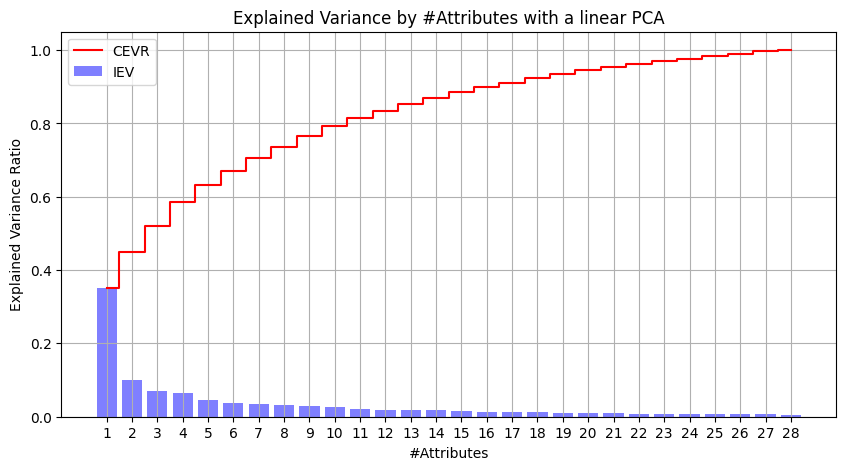

In [139]:
plt.figure(figsize=(10, 5))

plt.bar(range(1, n + 1), pca.explained_variance_ratio_, alpha=0.5, align='center', label='IEV', color='blue')

plt.step(range(1, n + 1), cv, where='mid', label='CEVR', color='red')

plt.xlabel('#Attributes')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by #Attributes with a linear PCA')
plt.xticks(ticks=range(1, n + 1))
plt.legend(loc='best')
plt.grid(True)
plt.show()

## Kernel (ignore it)

* SYSTEM CRASHED. Trying it with number of components < (total #features)
* CRASHED FOR #attributes = 5
* CRASHED FOR #attributes = 2.

Running out of RAM. Probably because of the size of the dataset.

In [ ]:
kernelPca = KernelPCA(random_state=42, n_components=1)
kernelPca.fit(X_train_scaled)

cv = np.cumsum(pca.explained_variance_ratio_)
n = len(pca.explained_variance_ratio_)

## Moving On:
Taking #attributes as 1 (clearly the elbow point) and 10 (>0.8 variance)

In [189]:
pca1 = PCA(n_components=1)

pca1_Xtrain = pca1.fit_transform(X_train_scaled)
pca1_Xtest = pca1.transform(X_test_scaled)

pca1_Xtrain.shape, pca1_Xtest.shape

((426471, 1), (142158, 1))

In [190]:
pca1_X_train = np.column_stack((pca1_Xtrain,colTrain))
pca1_X_test = np.column_stack((pca1_Xtest,colTest))

pca1_X_test.shape, pca1_X_train.shape

((142158, 2), (426471, 2))

In [72]:
pca1_X_train[0]

array([-1.0275396807025097, 'Above 50.01'], dtype=object)

In [191]:
pca10 = PCA(n_components=10)

pca10_Xtrain = pca10.fit_transform(X_train_scaled)
pca10_Xtest = pca10.transform(X_test_scaled)

pca10_Xtrain.shape, pca10_Xtest.shape

((426471, 10), (142158, 10))

In [192]:
pca10_X_train = np.column_stack((pca10_Xtrain,colTrain))
pca10_X_test = np.column_stack((pca10_Xtest,colTest))

In [193]:
pca10_X_test.shape, pca10_X_train.shape

((142158, 11), (426471, 11))

# Decision Tree with Wrapper to handle categorical Data

In [205]:
class customDT(BaseEstimator, ClassifierMixin):

    def __init__(self, categorical_features=None, feature_names=None, random_state=42, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1):
        self.categorical_features = categorical_features
        self.random_state = random_state
        self.criterion = criterion
        self.feature_names = feature_names
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.min_samples_leaf = min_samples_leaf
        self.pipeline = Pipeline([
            ('one_hot_encoder', ColumnTransformer(
                [('cat', OneHotEncoder(handle_unknown='ignore'), self.categorical_features)],
                remainder='passthrough')),
            ('tree', DecisionTreeClassifier(random_state=self.random_state,
                criterion=self.criterion,
                max_depth=self.max_depth,
                min_samples_split=self.min_samples_split,
                min_samples_leaf=self.min_samples_leaf))
        ])

    def fit(self, X, y):
      self.pipeline.fit(X, y)
      return self

    def predict(self, X):
      return self.pipeline.predict(X)

    def score(self, X, y):
      return self.pipeline.score(X, y)

    def predict_proba(self, X):
      return self.pipeline.named_steps['tree'].predict_proba(X)

    def get_params(self, deep=True):
      return super().get_params(deep=deep)

    def set_params(self, **parameters):
      for parameter, value in parameters.items():
        #print(parameter,value)
        setattr(self, parameter, value)
      return self

    def get_feature_names(self):
      if 'cat' in self.pipeline.named_steps['one_hot_encoder'].named_transformers_:
        cat_transformer = self.pipeline.named_steps['one_hot_encoder'].named_transformers_['cat']
        if hasattr(cat_transformer, 'get_feature_names_out'):
          cat_features = cat_transformer.get_feature_names_out()
          print('Categorical Features are: ', cat_features)
        else:
            cat_features = np.array([])
            print('No categorical features found or feature names are not retrievable.')
      else:
        cat_features = np.array([])
        print('Categorical transformer not found.')

      if hasattr(self.pipeline.named_steps['one_hot_encoder'], 'transformers_'):
          other_features_indices = self.pipeline.named_steps['one_hot_encoder'].transformers_[1][2]
          other_features = [self.feature_names[i] for i in other_features_indices]
          print('Other Features:', other_features)
      else:
          other_features = []
          print('Transformer indices for other features not found.')
      return np.concatenate((cat_features, other_features))

    def plot_tree(self):
      feature_names = self.get_feature_names()
      tree = self.pipeline.named_steps['tree']
      plt.figure(figsize=(20, 10))
      plot_tree(tree, feature_names=feature_names, filled=True, fontsize=12)
      plt.show()



In [206]:
cdt1 = customDT(categorical_features=[-1],feature_names=['PCA1','Amount'],max_depth=3, random_state=42)
cdt1.fit(pca1_X_train, y_train)
ypred1 = cdt1.predict(pca1_X_test)

In [207]:
score1 = cdt1.score(pca1_X_test,y_test)
score1

0.9181263101619325

Not bad for one feature.

In [201]:
cdt1.predict_proba(pca1_X_test)

array([[4.27026268e-04, 9.99572974e-01],
       [4.27026268e-04, 9.99572974e-01],
       [8.32947293e-01, 1.67052707e-01],
       ...,
       [9.24727014e-01, 7.52729864e-02],
       [8.32947293e-01, 1.67052707e-01],
       [9.24727014e-01, 7.52729864e-02]])

Categorical Features are:  ['x0_Above 50.01' 'x0_Below 24039.93' 'x0_Between q33 and q76']
Other Features: ['PCA1']


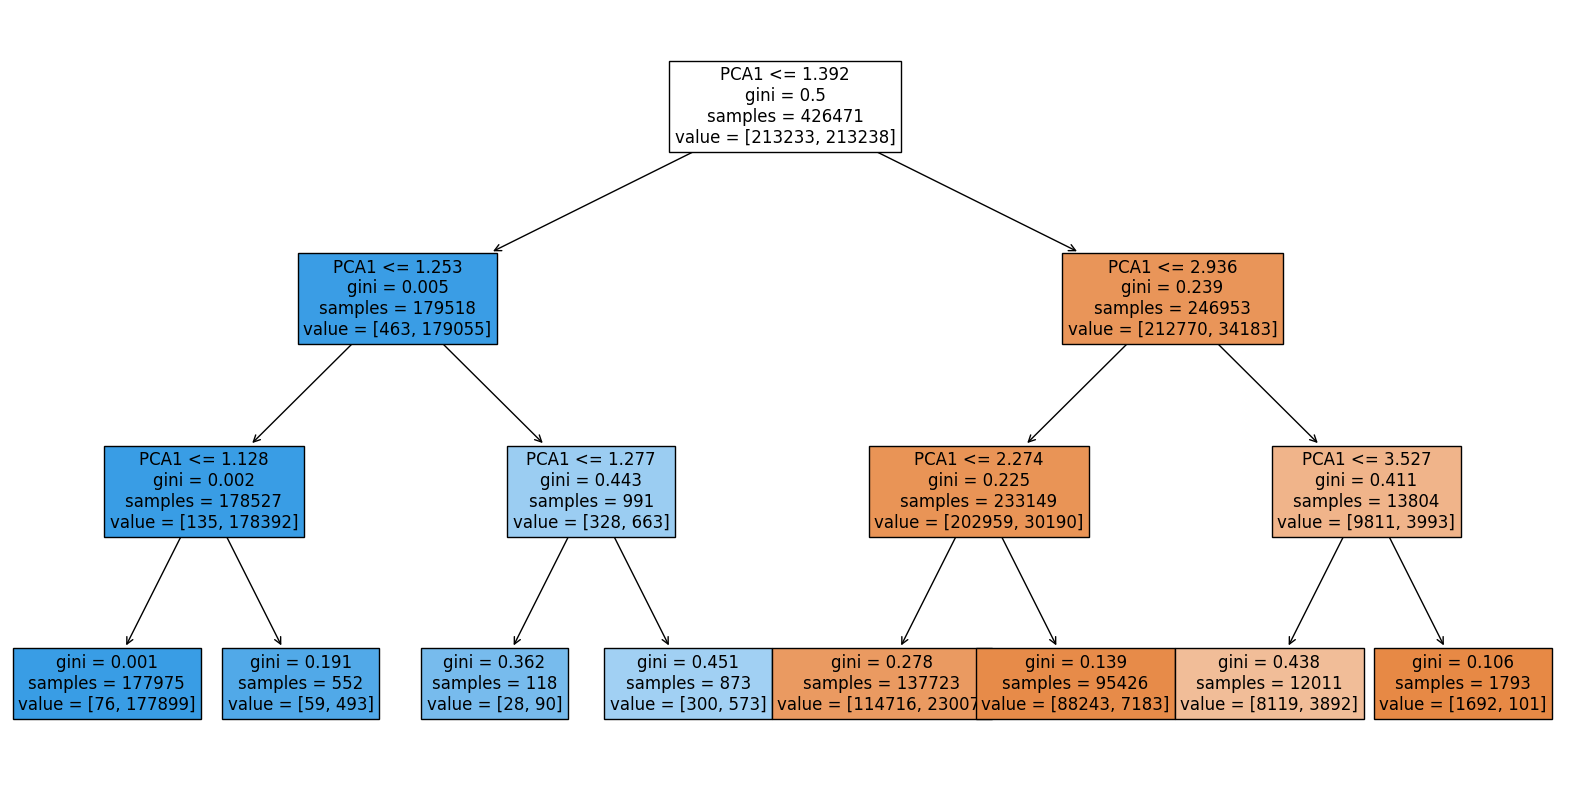

In [208]:
cdt1.plot_tree()

In [210]:
pca1_X_test[:,0].min(),pca1_X_test[:,0].max()

(-7.376472947090303, 17.437494821326258)

TODO: display feature names here. debugging again ugh.DONE!

In [203]:
cdt = customDT(categorical_features=[-1],feature_names=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','Amount'],max_depth=3, random_state=42)
cdt.fit(pca10_X_train, y_train)


customDT(categorical_features=[-1],
         feature_names=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8',
                        'PC9', 'PC10', 'Amount'],
         max_depth=3)

0.9497882637628554
Categorical Features are:  ['x0_Above 50.01' 'x0_Below 24039.93' 'x0_Between q33 and q76']
Other Features: ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10']


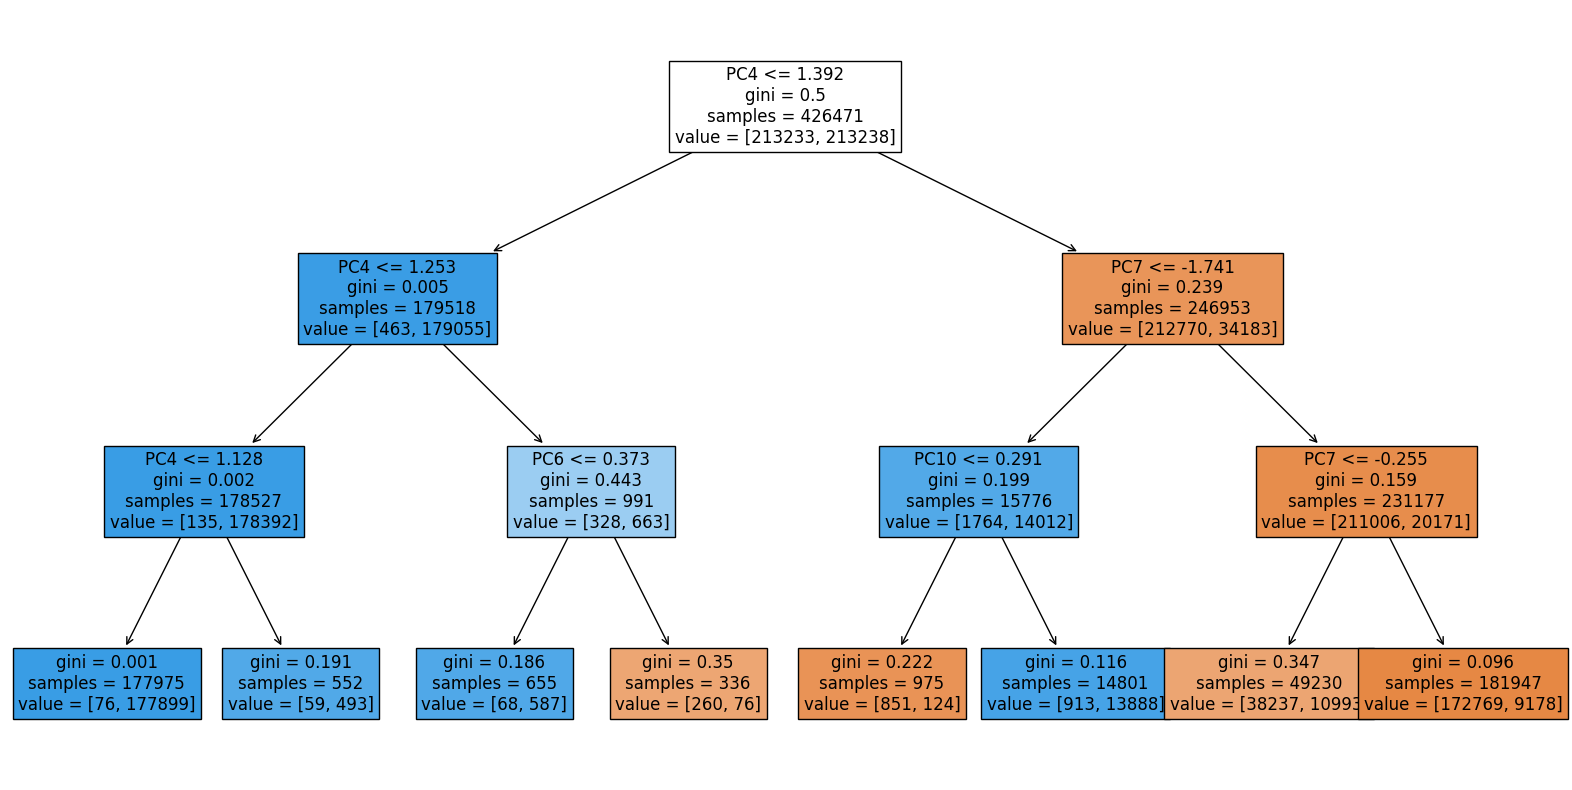

In [204]:
print(cdt.score(pca10_X_test,y_test))
cdt.plot_tree()

0.9961803064196176
Categorical Features are:  ['x0_Above 50.01' 'x0_Below 24039.93' 'x0_Between q33 and q76']
Other Features: ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10']


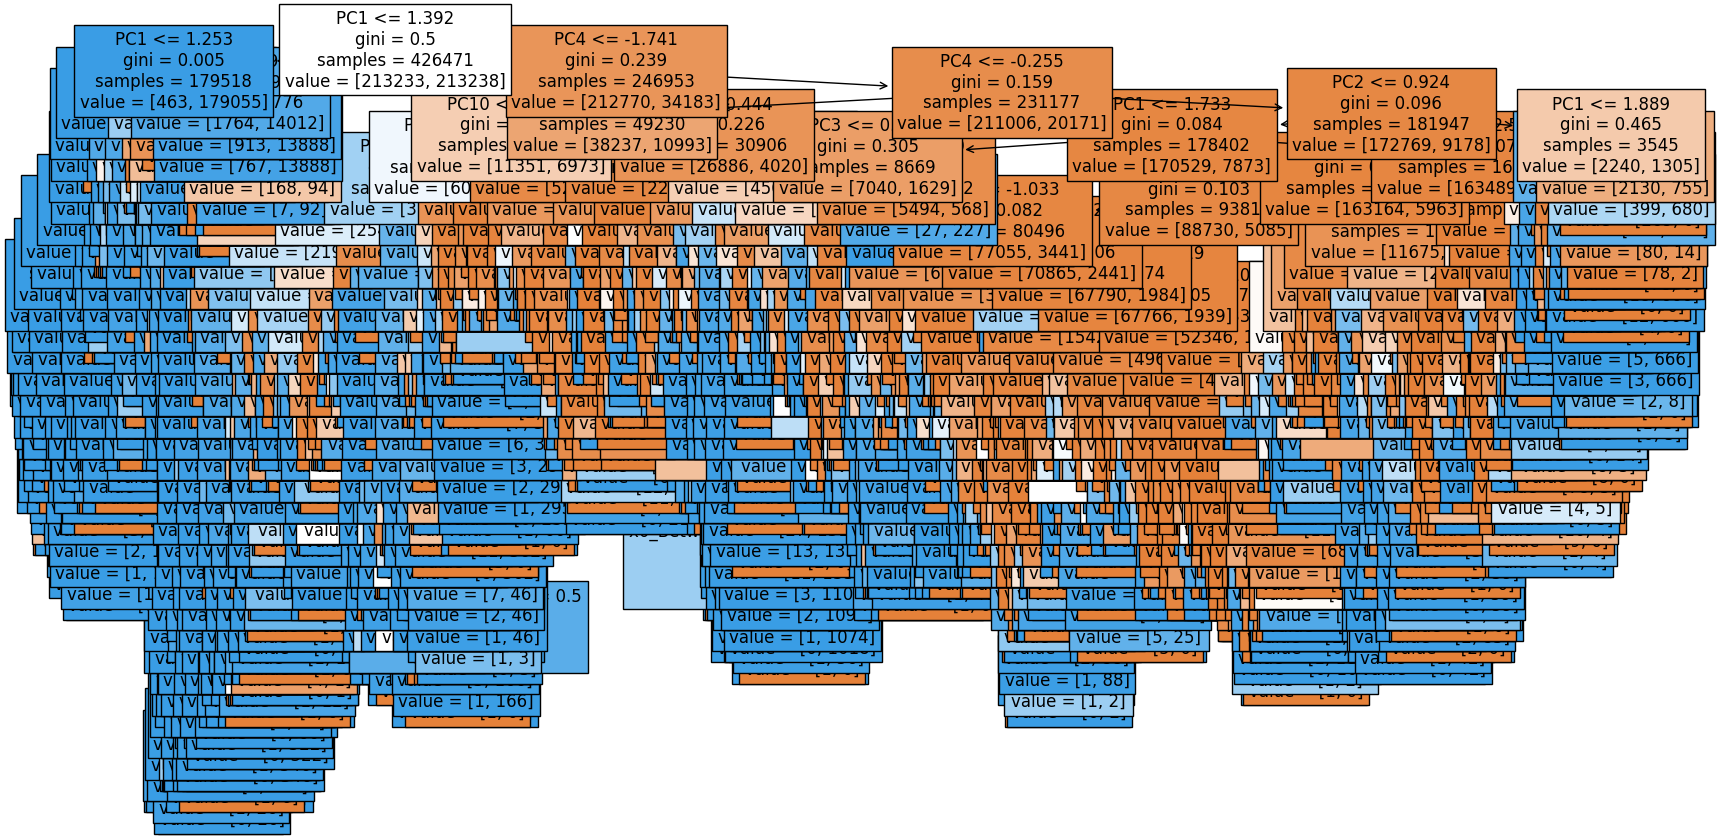

In [218]:
cdt10_2 = customDT(categorical_features=[-1],feature_names=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','Amount'], random_state=42)
cdt10_2.fit(pca10_X_train, y_train)

print(cdt10_2.score(pca10_X_test,y_test))
cdt10_2.plot_tree()

higher accuracy at the cost of interpretability.

# Tuning

Only for pca = 1

In [143]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2,3,5],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 4],
}

cdtFinal = customDT(categorical_features=[-1],feature_names=['PC1','Amount'])
gridSearch = GridSearchCV(estimator=cdtFinal, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)

gridSearch.fit(pca1_X_train, y_train)

best_params = gridSearch.best_params_
best_model = gridSearch.best_estimator_

y_pred = best_model.predict(pca1_X_test)

accuracy = best_model.score(pca1_X_test, y_test)
print(f'Test accuracy: {accuracy:.9f}')

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Test accuracy: 0.918126310


In [144]:
best_params

{'criterion': 'gini',
 'max_depth': 2,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

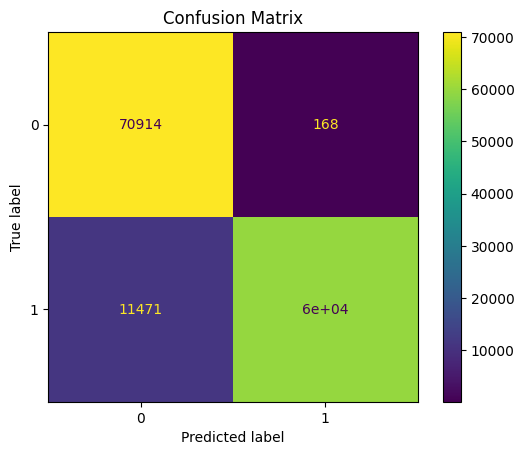

Precision: 0.997189366
Recall/Sensitivity: 0.838609376
Specificity: 0.997636532
F1 Score: 0.911050142


In [145]:
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot()
plt.title('Confusion Matrix')
plt.show()

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
tn = conf_matrix[0, 0]
fp = conf_matrix[0, 1]
specificity = tn / (tn + fp)

print(f'Precision: {precision:.9f}')
print(f'Recall/Sensitivity: {recall:.9f}')
print(f'Specificity: {specificity:.9f}')
print(f'F1 Score: {f1:.9f}')

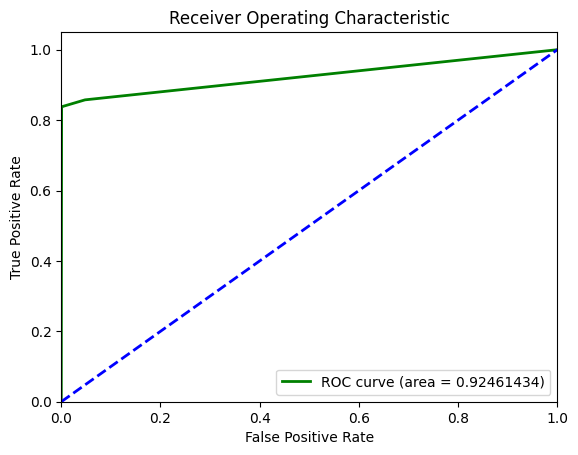

In [160]:
y_scores = best_model.predict_proba(pca1_X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='green', lw=2, label='ROC curve (area = %0.8f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [212]:
best_model = customDT(categorical_features=[-1],feature_names=['PCA1','Amount'], criterion = 'gini', max_depth = 2, min_samples_leaf = 1, min_samples_split = 2)
best_model.fit(pca1_X_train, y_train)

customDT(categorical_features=[-1], feature_names=['PCA1', 'Amount'],
         max_depth=2)

Categorical Features are:  ['x0_Above 50.01' 'x0_Below 24039.93' 'x0_Between q33 and q76']
Other Features: ['PCA1']


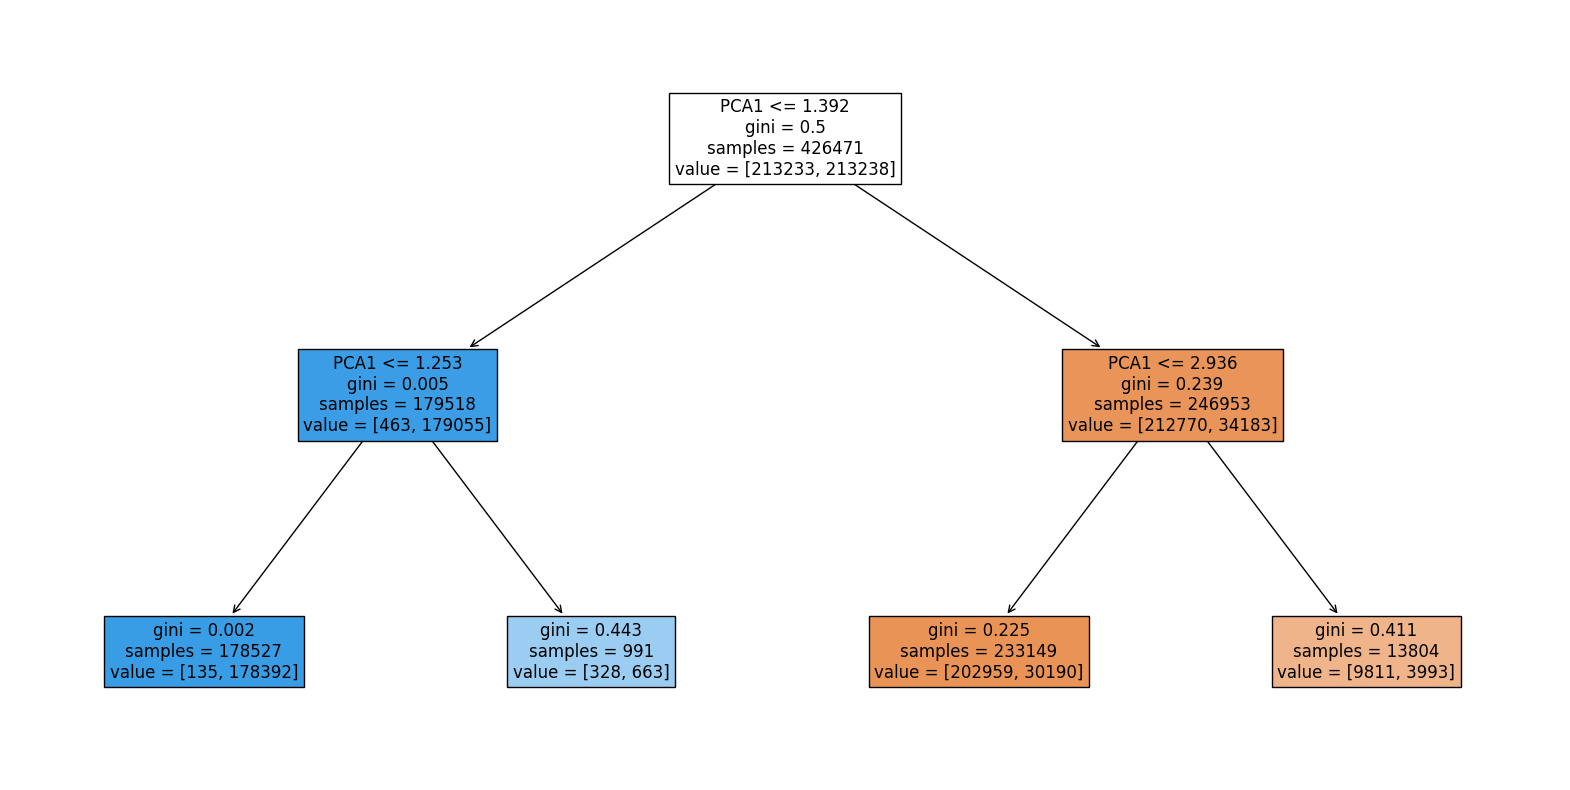

In [213]:
best_model.plot_tree()

In [214]:
import shap

explainer = shap.TreeExplainer(best_model.pipeline.named_steps['tree'])

pca1_X_transformed = best_model.pipeline[:-1].transform(pca1_X_train)

shap_values = explainer.shap_values(pca1_X_transformed)

shap_mean = np.abs(shap_values).mean(axis=0)

features = best_model.get_feature_names()

Categorical Features are:  ['x0_Above 50.01' 'x0_Below 24039.93' 'x0_Between q33 and q76']
Other Features: ['PCA1']


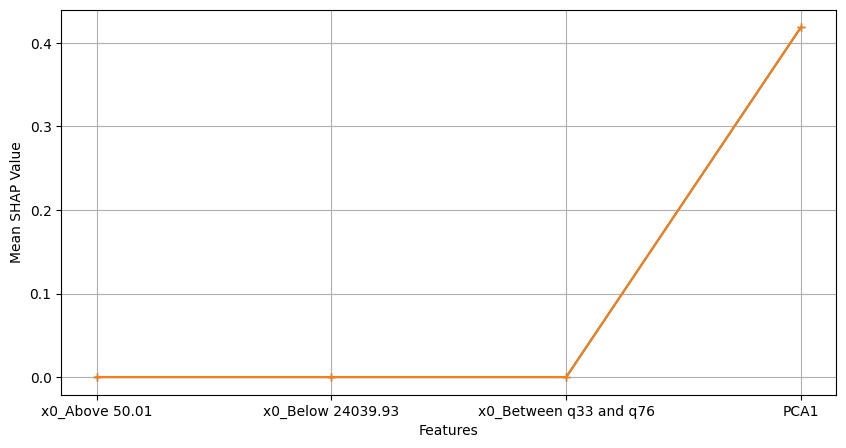

In [215]:
plt.figure(figsize=(10, 5))
plt.plot(features, shap_mean, marker='+')
plt.xlabel('Features')
plt.ylabel('Mean SHAP Value')
plt.grid(True)
plt.show()

In [219]:
explainer = shap.TreeExplainer(cdt10_2.pipeline.named_steps['tree'])

pca10_X_transformed = cdt10_2.pipeline[:-1].transform(pca10_X_train)

shap_values = explainer.shap_values(pca10_X_transformed)

shap_mean = np.abs(shap_values).mean(axis=0)

features = cdt10_2.get_feature_names()

Categorical Features are:  ['x0_Above 50.01' 'x0_Below 24039.93' 'x0_Between q33 and q76']
Other Features: ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10']


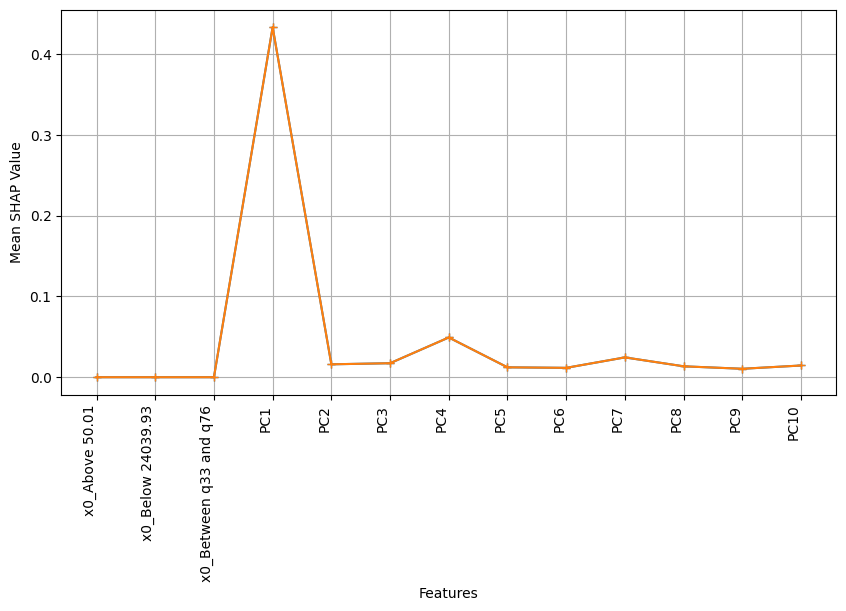

In [223]:
plt.figure(figsize=(10, 5))
plt.plot(features, shap_mean, marker='+')
plt.xlabel('Features')
plt.ylabel('Mean SHAP Value')
plt.xticks(rotation=90, ha='right')
plt.grid(True)
plt.show()